In [5]:
import pandas as pd
import numpy as np

In [6]:
df= pd.read_csv("Part I - preprocess ( cleaned, Standardization, Normalization, Binning, Dummy Variable).csv")
df.head(20)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495.0,8.703704,11.190476,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500.0,8.703704,11.190476,low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500.0,9.038462,12.368421,medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950.0,7.833333,9.791667,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450.0,10.681818,13.055556,low,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,110.0,5500.0,19,25,15250.0,9.400000,12.368421,low,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,110.0,5500.0,19,25,17710.0,9.400000,12.368421,low,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,110.0,5500.0,19,25,18920.0,9.400000,12.368421,low,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,140.0,5500.0,17,20,23875.0,11.750000,13.823529,medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,101.0,5800.0,23,29,16430.0,8.103448,10.217391,low,0,1


In [7]:
#correlation between different variables
# when we look at two variables over time, if one variable changes how does this affect change in the other variable
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,fuel-type-diesel,fuel-type-gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,-0.029807,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.181189,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.577576,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.707108,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.736728,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.084301,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.836921,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.783465,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.559112,0.554610,0.054458,-0.054458
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269,0.047089,0.036133,0.241064,-0.241064


In [8]:
#we need to get how is sspecific column correlation
y= df[["bore","stroke","compression-ratio","horsepower"]]
y.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187871,0.098267
compression-ratio,0.001263,0.187871,1.000000,-0.214514
horsepower,0.566936,0.098267,-0.214514,1.000000


In [9]:
#our target is build a linear correaltion model for predict the coar price when given the details of new car. for that we need to 
#identify correlations and most impornet columns for our mode.

#visualize the linear corelation, can easily see rlation between varibles

import matplotlib.pyplot as plt
import seaborn as sns


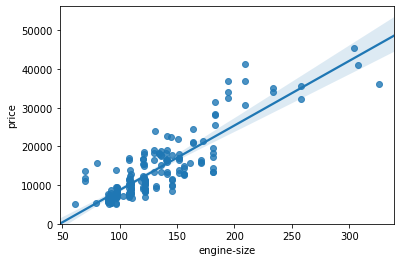

In [10]:
#find scatter plot engine-size and price. because engine size is a potentiol predictor varible of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)# y axis start with zero
plt.show()

In [11]:
df[["engine-size","price"]].corr()
#possitive big correlation beacuse 0.87

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


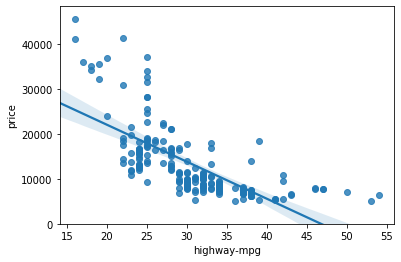

In [12]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.show()

In [13]:
df[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


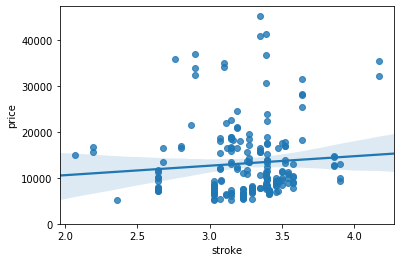

In [15]:
# example for weak correaltionship. 
sns.regplot(x="stroke",y="price", data=df)
plt.ylim(0,)
plt.show()

In [16]:
df[["stroke","price"]].corr() # you can see corr value is 0.082. so it has very less correationship

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


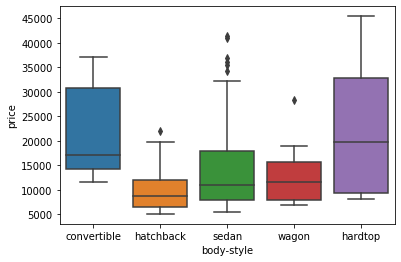

In [17]:
# see how boxplot design for categorical varibles 
sns.boxplot(x="body-style",y="price", data=df)
plt.show()

#you can see that box are overlap the price range. so body-style is not good varible for predict the price
#ex: you can see convertible body style price range 15 to 37 and also hardtop stype price range some thing bit simmiler to convertible
#so we cant say body style is good measurement 

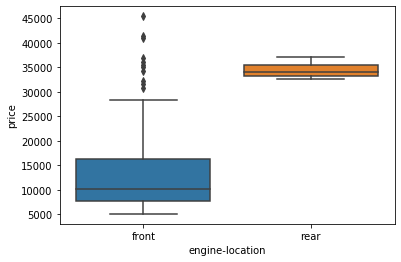

In [18]:
sns.boxplot(x="engine-location", y="price", data=df)
plt.show() # that boxplot price distribution range not overlap have clear  differance

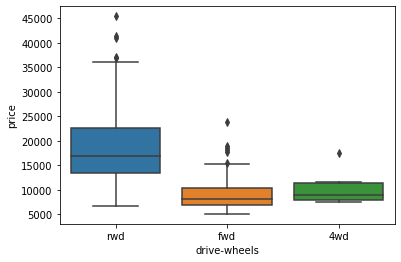

In [19]:
sns.boxplot(x="drive-wheels", y="price", data=df)
plt.show()